# COGS 108 - Car crash severity in New York city: An investigation of time of day and weather effect.

# Overview

This project primarily focused on examining the relationships between extreme weather conditions, time of the day and car accidents using publicly available datasets from the New York City (NYC). We match each car crash in NYC from 2012 to 2023 with weather information from the closet weather station, and conduct EDA, inferential analysis with multi_variate linear regression, and prediction model with Gradient Boosting Classifier (GBC) modeld to predict automobile safety based on a range of features including time of the day, accident contribution factors, and weather types, etc. We find out that for the time of the day effect on the severity of car crashes, night is statistically significant increasing the likelihood of accident severity, and has the most impact based on the prediction model. Meanwhile, for the weather type effect, statistically significant increasing the likelihood of accident severity, and has the most impact based on the prediction model. The predction model predicts well (with a 74% accuracy rate) on predicting if an accident does not involve injury or death, but does not predict well (with a 46% accuracy rate) on predicting if an accident involves injury or death.

<a id='research_question'></a>
# Research Question

Is there a statistically significant relationship between the time of the day and weather condition to the severity of vehicle collisions in New York City(NYC)? Also, are contributing factors to car crashes statistically related to the severity of vehicle collisions in NYC?

Furthermore, how can we utilize the patterns in traffic accidents to predict the automobile safety and avoid traffic accidents?

<a id='background'></a>

## Background & Prior Work

During the past decades, as the demand of automobiles has sky-rocketed, car accidents become a major concern among drivers, pedestrians, and citizens in general. As one of the busiest city in the world in terms of traffic, the Greater New York Area (including Mahattan, Bronx, Queens, Brooklyn, and Staten Island) ranked the first in total travel delay hours in 2011 [^Zou] compared to other regions in the US. In the state of New York, there were on average 1098 deaths each year due to unintentional vehicle accidents and over 12000 injuries [^healthDept]. According to previous literatures on safety science, some of the most prominent contributors to car crashes are excessive speeding, illegal alcohol or drug usage, following up too closely, driving distracted and failure to yield to pedestrians [^injuredCall]. Apart from driver characteristics, we also considered environmental factors such as light condition, road geometrics, and weather conditions. In a study of analyzing fatal crashes in NYC, the authors stated that failure to yield right of way, unsafe speed, and darkness are contributing factors that increase the probability of severe injury caused by car crashes. On the contrary, weather conditions (including cloudy, rain, and snow), backing, and pedestrians at intersections are contributors that have a negative impact on the rate of traffic accidents. Interestingly, the authors found that all weather conditions served as negative factors of risk of car accidents, preventing crashes from happening [^Mohamed]. The claim is also supported by another study focusing on truck crashes in NYC [^Zou]. Due to different samples collected and analyzed, Mohamed et al stated that there are no significant time of the day effects for the fatal crash in New York City, while Zou et al found that there were fewer crashes occurring during the afternoon and night periods compared to mid-day period for both single-truck crashes but the opposite for multi-vehicle crashes. We are interested in studying various contributors to car crashes in NYC by comparing data of severe(fatal) crashes and other minor crashes, with emphasize on uncovering the time of the day effect and weather effect on the risk of car crashes by by leveraging data science techniques in prior studies and analysis.

References:

[^healthDept]: New York State Department of Health. (2014). Motor Vehicle Traffic Crash Statistics: New York State Residents. https://www.health.ny.gov/statistics/prevention/injury_prevention/traffic/county_of_residence.htm

[^injuredcall]: Injured Call Today (13 Aug 2020) Top 10 causes of car accidents in New York. https://www.injuredcalltoday.com/top-10-causes-of-car-accidents-in-new-york/

[^Mohamed]: Mohamed, M. G., Saunier, N., Miranda-Moreno, L. F., & Ukkusuri, S. V. (2013). A clustering regression approach: A comprehensive injury severity analysis of pedestrian–vehicle crashes in New York, US and Montreal, Canada. Safety science, 54, 27-37.

[^Zou]: Zou, W., Wang, X., & Zhang, D. (2017). Truck crash severity in New York city: an investigation of the spatial and the time of day effects. Accident Analysis & Prevention, 99, 249-261.

# Hypothesis


Our null hypothesis is there will be no significant difference in the severity of motor vehicle collisions in NYC at different times of day. The occurrence of collisions is independent of the time of day. The severity of motor vehicle collisions in NYC are not influenced by weather conditions. The occurrence of collisions is independent of the prevailing weather conditions.

Our alternative hypothesis is that the severity of motor vehicle collisions in NYC is higher in morning hours than evening hours; and the severity of motor vehicle collisions in NYC is higher under worse weather conditions such as rain and snow.

# Dataset(s)

Ideally, the
 car crashes dataset from NYC should include date and time, locational information, vehicle(s) information, reasons for crashes, harm from crashes, contributing factors that caused the accident. The dataset should cover at least one year, generated from official police reports concerning the accidents, stored in any readable format such as .csv. Additionally, the waether dataset should allow us to match the date, time, and location with the car crashes dataset. Ideally, it should contain locational information and hourly weather variables reported from different weather stations across boroughs in NYC, covering the same period as the car crashed dataset in any readable format such as .csv.

Current Datasets

Motor Vehicle Collisions (2012-2023).
Link: https://www.kaggle.com/datasets/utkarshx27/motor-vehicle-collisions. Description: The Motor Vehicle Collisions data tables contain detailed crash events information from all police reported motor vehicle collisions in NYC from June 2012 to April 2023. Upset: The dataset does not contain enough information on vehicles involved in each car crash, and lacks drivers' information.

Dail Summary Climate Data (2012-2023)
Description: The Dail Summary Climate Data is obtained upon open requests on the NOAA website: https://www.ncdc.noaa.gov/cdo-web/search. It contains climate data from weather stations in NYC, covering from June 2012 to April 2023. The lists of weather variables are: Precipitation, Snowfall, Average Temperature, Maximum temperature, Minimum temperature, Average wind speed, and Weather types.

# Setup

In [61]:
import numpy as np
import pandas as pd
from scipy.spatial import KDTree

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

# Data Cleaning

Describe your data cleaning steps here.

First, we clean the NYC car crashes dataset. The following code upload and shows the first 5 rows of the dataset.

In [2]:
CarCrash = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')
CarCrash.head()

/var/folders/wh/v4h2zdv54kgcywn1gf9_y4tc0000gn/T/ipykernel_29158/3816887589.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  CarCrash = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


Then we can take a look at the columnns of this dataset.

In [3]:
CarCrash.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

Since we had more variables than necessary, we decided to remove the rows that lacked locational information and dropped the columns that were deemed irrelevant. 

In [4]:
CarCrash = CarCrash.dropna(subset = ['LOCATION'])
CarCrash = CarCrash.drop(['BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID', 'LOCATION'], axis = 1)
CarCrash.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,09/11/2021,9:35,40.667202,-73.866500,0.0,0.0,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,40.683304,-73.917274,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12/14/2021,17:05,40.709183,-73.956825,0.0,0.0,Passing Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
7,12/14/2021,8:17,40.868160,-73.831480,2.0,0.0,Unspecified,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,40.671720,-73.897100,0.0,0.0,Driver Inexperience,Unspecified,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN


Convert CRASH DATE to pandas datetime object and sort by ascending order.

In [5]:
CarCrash['CRASH DATE'] = pd.to_datetime(CarCrash['CRASH DATE'], yearfirst = True)
CarCrash = CarCrash.sort_values('CRASH DATE').reset_index(drop = True)
CarCrash.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2012-07-01,13:10,40.744660,-73.906805,0.0,0.0,Driver Inexperience,Unspecified,NaN,NaN,NaN,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1,2012-07-01,16:22,40.683726,-73.967961,0.0,0.0,Unspecified,Unspecified,NaN,NaN,NaN,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
2,2012-07-01,10:11,40.720477,-73.989718,0.0,0.0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,2012-07-01,16:15,40.645457,-74.006367,0.0,0.0,Unspecified,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
4,2012-07-01,21:31,40.763115,-73.999650,0.0,0.0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


The following function converts CRASH TIME to categorical time of the day.

In [6]:
def to_time_section(time_str):
    hour = int(time_str.split(':')[0])
    if 5 <= hour < 8:
        return 'Dawn'
    if 8 <= hour < 12:
        return 'Morning'
    if 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

CarCrash['CRASH TIME'] = CarCrash['CRASH TIME'].apply(to_time_section)
CarCrash.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2012-07-01,Afternoon,40.744660,-73.906805,0.0,0.0,Driver Inexperience,Unspecified,NaN,NaN,NaN,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1,2012-07-01,Afternoon,40.683726,-73.967961,0.0,0.0,Unspecified,Unspecified,NaN,NaN,NaN,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
2,2012-07-01,Morning,40.720477,-73.989718,0.0,0.0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,2012-07-01,Afternoon,40.645457,-74.006367,0.0,0.0,Unspecified,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
4,2012-07-01,Night,40.763115,-73.999650,0.0,0.0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


The following function identies whether a car crash involves one or multi vehicles, and assign a new variable IS SINGLE VEHICLE to indicate the result.

In [7]:
def collision_type(vehicle_str):
    return vehicle_str != vehicle_str

CarCrash['IS SINGLE VEHICLE'] = CarCrash['VEHICLE TYPE CODE 2'].apply(collision_type)
CarCrash = CarCrash.drop(['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], axis = 1)
CarCrash.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,IS SINGLE VEHICLE
0,2012-07-01,Afternoon,40.744660,-73.906805,0.0,0.0,Driver Inexperience,Unspecified,NaN,NaN,NaN,False
1,2012-07-01,Afternoon,40.683726,-73.967961,0.0,0.0,Unspecified,Unspecified,NaN,NaN,NaN,False
2,2012-07-01,Morning,40.720477,-73.989718,0.0,0.0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,False
3,2012-07-01,Afternoon,40.645457,-74.006367,0.0,0.0,Unspecified,Unspecified,NaN,NaN,NaN,False
4,2012-07-01,Night,40.763115,-73.999650,0.0,0.0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,False


Assign a new variable IS Major Accident to indicate whether a car crash involves injury or death.

In [8]:
CarCrash['IS Major Accident'] = (CarCrash['NUMBER OF PERSONS INJURED'] > 0) | (CarCrash['NUMBER OF PERSONS KILLED'] > 0)
CarCrash.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,IS SINGLE VEHICLE,IS Major Accident
0,2012-07-01,Afternoon,40.744660,-73.906805,0.0,0.0,Driver Inexperience,Unspecified,NaN,NaN,NaN,False,False
1,2012-07-01,Afternoon,40.683726,-73.967961,0.0,0.0,Unspecified,Unspecified,NaN,NaN,NaN,False,False
2,2012-07-01,Morning,40.720477,-73.989718,0.0,0.0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,False,False
3,2012-07-01,Afternoon,40.645457,-74.006367,0.0,0.0,Unspecified,Unspecified,NaN,NaN,NaN,False,False
4,2012-07-01,Night,40.763115,-73.999650,0.0,0.0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,False,False


The following code assigns 5 arrays that classify the contributing factors of car crashes in the dataset into 5 differnt categories.

In [9]:
CarCrash[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']] = CarCrash[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']].fillna('Unspecified')

Driving_Technique = set(['Driver Inexperience', 'Failure to Yield Right-of-Way', 'Backing Unsafely', 'Following Too Closely', 'Traffic Control Disregarded', 'Unsafe Speed', 'Failure to Keep Right', 'Turning Improperly', 'Aggressive Driving/Road Rage', 'Passing or Lane Usage Improper', 'Steering Failure', 'Unsafe Lane Changing', 'Passing Too Closely'])

Inattention_Inability = set(['Fatigued/Drowsy', 'Other Electronic Device', 'Prescription Medication', 'Driver Inattention/Distraction', 'Lost Consciousness', 'Physical Disability', 'Alcohol Involvement', 'Illness', 'Fell Asleep', 'Drugs (Illegal)', 'Cell Phone (hands-free)', 'Cell Phone (hand-held)', 'Illnes', 'Drugs (illegal)', 'Cell Phone (hand-Held)', 'Vehicle Vandalism', 'Eating or Drinking', 'Texting', 'Listening/Using Headphones', 'Using On Board Navigation Device'])

Vehicle_Factor = set(['Oversized Vehicle', 'Tire Failure/Inadequate', 'Brakes Defective', 'Tow Hitch Defective', 'Accelerator Defective', 'Windshield Inadequate', 'Headlights Defective', 'Driverless/Runaway Vehicle', 'Tinted Windows', 'Other Lighting Defects'])

Outside_Factor = set(['Passenger Distraction', 'View Obstructed/Limited', 'Outside Car Distraction', 'Other Vehicular', 'Reaction to Other Uninvolved Vehicle', 'Glare', 'Lane Marking Improper/Inadequate', 'Pavement Defective', 'Pavement Slippery', 'Obstruction/Debris', 'Animals Action', 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'Traffic Control Device Improper/Non-Working', 'Shoulders Defective/Improper', 'Reaction to Uninvolved Vehicle'])

Unspecified = set(['Unspecified', 'nan', '80', '1'])

The following function converts any contributing factor into the 5 categories we defined above.

In [10]:
def simplified_factor(contributing_factor):
    if contributing_factor in Driving_Technique:
        return 'Driving skill'
    elif contributing_factor in Inattention_Inability:
        return 'Inattention/Inability'
    elif contributing_factor in Vehicle_Factor:
        return 'Vehicle defect'
    elif contributing_factor in Outside_Factor:
        return 'External factor'
    else:
        return 'AUnspecified'

In [11]:
CarCrash['CONTRIBUTING FACTOR VEHICLE 1'] = CarCrash['CONTRIBUTING FACTOR VEHICLE 1'].apply(simplified_factor)
CarCrash['CONTRIBUTING FACTOR VEHICLE 2'] = CarCrash['CONTRIBUTING FACTOR VEHICLE 2'].apply(simplified_factor)
CarCrash['CONTRIBUTING FACTOR VEHICLE 3'] = CarCrash['CONTRIBUTING FACTOR VEHICLE 3'].apply(simplified_factor)
CarCrash['CONTRIBUTING FACTOR VEHICLE 4'] = CarCrash['CONTRIBUTING FACTOR VEHICLE 4'].apply(simplified_factor)
CarCrash['CONTRIBUTING FACTOR VEHICLE 5'] = CarCrash['CONTRIBUTING FACTOR VEHICLE 5'].apply(simplified_factor)
CarCrash.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,IS SINGLE VEHICLE,IS Major Accident
0,2012-07-01,Afternoon,40.744660,-73.906805,0.0,0.0,Driving skill,AUnspecified,AUnspecified,AUnspecified,AUnspecified,False,False
1,2012-07-01,Afternoon,40.683726,-73.967961,0.0,0.0,AUnspecified,AUnspecified,AUnspecified,AUnspecified,AUnspecified,False,False
2,2012-07-01,Morning,40.720477,-73.989718,0.0,0.0,Driving skill,AUnspecified,AUnspecified,AUnspecified,AUnspecified,False,False
3,2012-07-01,Afternoon,40.645457,-74.006367,0.0,0.0,AUnspecified,AUnspecified,AUnspecified,AUnspecified,AUnspecified,False,False
4,2012-07-01,Night,40.763115,-73.999650,0.0,0.0,Inattention/Inability,AUnspecified,AUnspecified,AUnspecified,AUnspecified,False,False


Create 4 time of the day dummies according to CRASH TIME.

In [12]:
crash_time = CarCrash['CRASH TIME']
CarCrash = pd.get_dummies(data = CarCrash, columns = ['CRASH TIME'])
CarCrash['CRASH TIME'] = crash_time
CarCrash.head()

,CRASH DATE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,IS SINGLE VEHICLE,IS Major Accident,CRASH TIME_Afternoon,CRASH TIME_Dawn,CRASH TIME_Morning,CRASH TIME_Night,CRASH TIME
0,2012-07-01,40.744660,-73.906805,0.0,0.0,Driving skill,AUnspecified,AUnspecified,AUnspecified,AUnspecified,False,False,True,False,False,False,Afternoon
1,2012-07-01,40.683726,-73.967961,0.0,0.0,AUnspecified,AUnspecified,AUnspecified,AUnspecified,AUnspecified,False,False,True,False,False,False,Afternoon
2,2012-07-01,40.720477,-73.989718,0.0,0.0,Driving skill,AUnspecified,AUnspecified,AUnspecified,AUnspecified,False,False,False,False,True,False,Morning
3,2012-07-01,40.645457,-74.006367,0.0,0.0,AUnspecified,AUnspecified,AUnspecified,AUnspecified,AUnspecified,False,False,True,False,False,False,Afternoon
4,2012-07-01,40.763115,-73.999650,0.0,0.0,Inattention/Inability,AUnspecified,AUnspecified,AUnspecified,AUnspecified,False,False,False,False,False,True,Night


Create 4 dummies for each of the CONTRIBUTING FACTOR VEHICLE 1-5 out of 5 categories by removing the AUnspecified level.

In [13]:
CarCrash = pd.get_dummies(data = CarCrash, columns = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5'], drop_first = True)
CarCrash.head()

,CRASH DATE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,IS SINGLE VEHICLE,IS Major Accident,CRASH TIME_Afternoon,CRASH TIME_Dawn,CRASH TIME_Morning,...,CONTRIBUTING FACTOR VEHICLE 3_Inattention/Inability,CONTRIBUTING FACTOR VEHICLE 3_Vehicle defect,CONTRIBUTING FACTOR VEHICLE 4_Driving skill,CONTRIBUTING FACTOR VEHICLE 4_External factor,CONTRIBUTING FACTOR VEHICLE 4_Inattention/Inability,CONTRIBUTING FACTOR VEHICLE 4_Vehicle defect,CONTRIBUTING FACTOR VEHICLE 5_Driving skill,CONTRIBUTING FACTOR VEHICLE 5_External factor,CONTRIBUTING FACTOR VEHICLE 5_Inattention/Inability,CONTRIBUTING FACTOR VEHICLE 5_Vehicle defect
0,2012-07-01,40.744660,-73.906805,0.0,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2012-07-01,40.683726,-73.967961,0.0,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2012-07-01,40.720477,-73.989718,0.0,0.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2012-07-01,40.645457,-74.006367,0.0,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2012-07-01,40.763115,-73.999650,0.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Assign 4 new variables by combining the above 20 dummies by categories to get the weight of contributing factors for each car crash.

In [14]:
for i in ['CONTRIBUTING FACTOR VEHICLE 1_Driving skill',
       'CONTRIBUTING FACTOR VEHICLE 1_External factor',
       'CONTRIBUTING FACTOR VEHICLE 1_Inattention/Inability',
       'CONTRIBUTING FACTOR VEHICLE 1_Vehicle defect',
       'CONTRIBUTING FACTOR VEHICLE 2_Driving skill',
       'CONTRIBUTING FACTOR VEHICLE 2_External factor',
       'CONTRIBUTING FACTOR VEHICLE 2_Inattention/Inability',
       'CONTRIBUTING FACTOR VEHICLE 2_Vehicle defect',
       'CONTRIBUTING FACTOR VEHICLE 3_Driving skill',
       'CONTRIBUTING FACTOR VEHICLE 3_External factor',
       'CONTRIBUTING FACTOR VEHICLE 3_Inattention/Inability',
       'CONTRIBUTING FACTOR VEHICLE 3_Vehicle defect',
       'CONTRIBUTING FACTOR VEHICLE 4_Driving skill',
       'CONTRIBUTING FACTOR VEHICLE 4_External factor',
       'CONTRIBUTING FACTOR VEHICLE 4_Inattention/Inability',
       'CONTRIBUTING FACTOR VEHICLE 4_Vehicle defect',
       'CONTRIBUTING FACTOR VEHICLE 5_Driving skill',
       'CONTRIBUTING FACTOR VEHICLE 5_External factor',
       'CONTRIBUTING FACTOR VEHICLE 5_Inattention/Inability',
       'CONTRIBUTING FACTOR VEHICLE 5_Vehicle defect']:
       CarCrash[i] = CarCrash[i].astype(int)



CarCrash['Driving skill factor'] = CarCrash['CONTRIBUTING FACTOR VEHICLE 1_Driving skill'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 2_Driving skill'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 3_Driving skill'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 4_Driving skill'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 5_Driving skill'] 
CarCrash['External factor'] = CarCrash['CONTRIBUTING FACTOR VEHICLE 1_External factor'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 2_External factor'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 3_External factor'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 4_External factor'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 5_External factor']
CarCrash['Inattention/Inability factor'] = CarCrash['CONTRIBUTING FACTOR VEHICLE 1_Inattention/Inability'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 2_Inattention/Inability'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 3_Inattention/Inability'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 4_Inattention/Inability'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 5_Inattention/Inability']
CarCrash['Vehicle defect factor'] = CarCrash['CONTRIBUTING FACTOR VEHICLE 1_Vehicle defect'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 2_Vehicle defect'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 3_Vehicle defect'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 4_Vehicle defect'] + CarCrash['CONTRIBUTING FACTOR VEHICLE 5_Vehicle defect']
CarCrash.head()

,CRASH DATE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,IS SINGLE VEHICLE,IS Major Accident,CRASH TIME_Afternoon,CRASH TIME_Dawn,CRASH TIME_Morning,...,CONTRIBUTING FACTOR VEHICLE 4_Inattention/Inability,CONTRIBUTING FACTOR VEHICLE 4_Vehicle defect,CONTRIBUTING FACTOR VEHICLE 5_Driving skill,CONTRIBUTING FACTOR VEHICLE 5_External factor,CONTRIBUTING FACTOR VEHICLE 5_Inattention/Inability,CONTRIBUTING FACTOR VEHICLE 5_Vehicle defect,Driving skill factor,External factor,Inattention/Inability factor,Vehicle defect factor
0,2012-07-01,40.744660,-73.906805,0.0,0.0,False,False,True,False,False,...,0,0,0,0,0,0,1,0,0,0
1,2012-07-01,40.683726,-73.967961,0.0,0.0,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
2,2012-07-01,40.720477,-73.989718,0.0,0.0,False,False,False,False,True,...,0,0,0,0,0,0,1,0,0,0
3,2012-07-01,40.645457,-74.006367,0.0,0.0,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
4,2012-07-01,40.763115,-73.999650,0.0,0.0,False,False,False,False,False,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# CarCrash.columns #['CONTRIBUTING FACTOR VEHICLE 1_Driving skill']

Drop irrelevant columns, and the cleaning is complete.

In [16]:
CarCrash = CarCrash.drop(['CONTRIBUTING FACTOR VEHICLE 1_Driving skill',
       'CONTRIBUTING FACTOR VEHICLE 1_External factor',
       'CONTRIBUTING FACTOR VEHICLE 1_Inattention/Inability',
       'CONTRIBUTING FACTOR VEHICLE 1_Vehicle defect',
       'CONTRIBUTING FACTOR VEHICLE 2_Driving skill',
       'CONTRIBUTING FACTOR VEHICLE 2_External factor',
       'CONTRIBUTING FACTOR VEHICLE 2_Inattention/Inability',
       'CONTRIBUTING FACTOR VEHICLE 2_Vehicle defect',
       'CONTRIBUTING FACTOR VEHICLE 3_Driving skill',
       'CONTRIBUTING FACTOR VEHICLE 3_External factor',
       'CONTRIBUTING FACTOR VEHICLE 3_Inattention/Inability',
       'CONTRIBUTING FACTOR VEHICLE 3_Vehicle defect',
       'CONTRIBUTING FACTOR VEHICLE 4_Driving skill',
       'CONTRIBUTING FACTOR VEHICLE 4_External factor',
       'CONTRIBUTING FACTOR VEHICLE 4_Inattention/Inability',
       'CONTRIBUTING FACTOR VEHICLE 4_Vehicle defect',
       'CONTRIBUTING FACTOR VEHICLE 5_Driving skill',
       'CONTRIBUTING FACTOR VEHICLE 5_External factor',
       'CONTRIBUTING FACTOR VEHICLE 5_Inattention/Inability',
       'CONTRIBUTING FACTOR VEHICLE 5_Vehicle defect'], axis = 1 )

CarCrash.head()

,CRASH DATE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,IS SINGLE VEHICLE,IS Major Accident,CRASH TIME_Afternoon,CRASH TIME_Dawn,CRASH TIME_Morning,CRASH TIME_Night,CRASH TIME,Driving skill factor,External factor,Inattention/Inability factor,Vehicle defect factor
0,2012-07-01,40.744660,-73.906805,0.0,0.0,False,False,True,False,False,False,Afternoon,1,0,0,0
1,2012-07-01,40.683726,-73.967961,0.0,0.0,False,False,True,False,False,False,Afternoon,0,0,0,0
2,2012-07-01,40.720477,-73.989718,0.0,0.0,False,False,False,False,True,False,Morning,1,0,0,0
3,2012-07-01,40.645457,-74.006367,0.0,0.0,False,False,True,False,False,False,Afternoon,0,0,0,0
4,2012-07-01,40.763115,-73.999650,0.0,0.0,False,False,False,False,False,True,Night,0,0,1,0


We then proceed to clean the NYC weather dataset. Since NOAA imposes download limitations, there are in total 4 separate datesets. We concat them into one dataset.

In [17]:
to15 = pd.read_csv('2012-2015.csv')
to18 = pd.read_csv('2015-2018.csv')
to21 = pd.read_csv('2018-2021.csv')
to23 = pd.read_csv('2021-2023.csv')

WeatherNYC = pd.concat([to15, to18, to21, to23])
WeatherNYC.head()


,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,TAVG,TMAX,...,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT22
0,US1NYWC0003,41.0639,-73.7722,71.0,2013-04-08,NaN,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NYWC0003,41.0639,-73.7722,71.0,2013-04-09,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NYWC0003,41.0639,-73.7722,71.0,2013-04-10,NaN,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NYWC0003,41.0639,-73.7722,71.0,2013-04-11,NaN,0.59,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NYWC0003,41.0639,-73.7722,71.0,2013-04-12,NaN,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Look at the columns of this dataset.

In [18]:
WeatherNYC.columns

Index(['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND', 'PRCP',
       'SNOW', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05',
       'WT06', 'WT08', 'WT09', 'WT10', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16',
       'WT17', 'WT18', 'WT19', 'WT22'],
      dtype='object')

Drop rows without information on wind speed, precipitaion, snowfall, and temperature. Drop irrelevant columns.

In [19]:
WeatherNYC = WeatherNYC.dropna(subset = ['AWND', 'PRCP', 'SNOW', 'TMAX', 'TMIN']).drop(['TAVG', 'WT03', 'WT04', 'WT05',
       'WT06', 'WT09', 'WT10', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16',
       'WT17', 'WT18', 'WT19', 'WT22'], axis = 1)
WeatherNYC.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,TMAX,TMIN,WT01,WT02,WT08
3542,USW00014732,40.77945,-73.88027,3.0,2012-06-30,10.29,0.00,0.0,96.0,80.0,NaN,NaN,NaN
3543,USW00014732,40.77945,-73.88027,3.0,2012-07-01,8.95,0.00,0.0,97.0,77.0,NaN,NaN,NaN
3544,USW00014732,40.77945,-73.88027,3.0,2012-07-02,8.72,0.00,0.0,88.0,73.0,NaN,NaN,1.0
3545,USW00014732,40.77945,-73.88027,3.0,2012-07-03,9.17,0.00,0.0,92.0,73.0,NaN,NaN,NaN
3546,USW00014732,40.77945,-73.88027,3.0,2012-07-04,10.07,0.05,0.0,95.0,73.0,NaN,NaN,NaN


Rename columns for interpretability.

In [20]:
rename_columns = {'AWND': 'Average wind speed', 'PRCP': 'Precipitation', 'SNOW': 'Snowfall', 'TMAX': 'Maximum temperature', 
'TMIN': 'Minimum temperature', 'WT01': 'Fog', 'WT02': 'Heavy fog', 'WT08': 'Smoke or haze'}
WeatherNYC = WeatherNYC.rename(mapper = rename_columns, axis = 1)
WeatherNYC.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,Average wind speed,Precipitation,Snowfall,Maximum temperature,Minimum temperature,Fog,Heavy fog,Smoke or haze
3542,USW00014732,40.77945,-73.88027,3.0,2012-06-30,10.29,0.00,0.0,96.0,80.0,NaN,NaN,NaN
3543,USW00014732,40.77945,-73.88027,3.0,2012-07-01,8.95,0.00,0.0,97.0,77.0,NaN,NaN,NaN
3544,USW00014732,40.77945,-73.88027,3.0,2012-07-02,8.72,0.00,0.0,88.0,73.0,NaN,NaN,1.0
3545,USW00014732,40.77945,-73.88027,3.0,2012-07-03,9.17,0.00,0.0,92.0,73.0,NaN,NaN,NaN
3546,USW00014732,40.77945,-73.88027,3.0,2012-07-04,10.07,0.05,0.0,95.0,73.0,NaN,NaN,NaN


Convert DATE to pandas datetime object and sort by ascending order.

In [21]:
WeatherNYC['DATE'] = pd.to_datetime(WeatherNYC['DATE'], yearfirst = True)
WeatherNYC = WeatherNYC.sort_values(by = 'DATE').reset_index(drop = True)
WeatherNYC.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,Average wind speed,Precipitation,Snowfall,Maximum temperature,Minimum temperature,Fog,Heavy fog,Smoke or haze
0,USW00014732,40.77945,-73.88027,3.0,2012-06-30,10.29,0.0,0.0,96.0,80.0,NaN,NaN,NaN
1,USW00094789,40.63915,-73.76390,2.7,2012-06-30,11.86,0.0,0.0,93.0,75.0,NaN,NaN,NaN
2,USW00094728,40.77898,-73.96925,42.7,2012-06-30,4.70,0.0,0.0,93.0,77.0,NaN,NaN,NaN
3,USW00014734,40.68275,-74.16927,1.9,2012-06-30,10.29,0.0,0.0,97.0,77.0,NaN,NaN,NaN
4,USW00014734,40.68275,-74.16927,1.9,2012-07-01,10.51,0.0,0.0,98.0,72.0,NaN,NaN,NaN


Keep only the 4 weather stations that cover the entire time range.

In [22]:
WeatherNYC = WeatherNYC[(WeatherNYC['STATION'] == 'USW00014732') | (WeatherNYC['STATION'] == 'USW00094789') | 
(WeatherNYC['STATION'] == 'USW00094728') | (WeatherNYC['STATION'] == 'USW00014734')]
WeatherNYC.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,Average wind speed,Precipitation,Snowfall,Maximum temperature,Minimum temperature,Fog,Heavy fog,Smoke or haze
0,USW00014732,40.77945,-73.88027,3.0,2012-06-30,10.29,0.0,0.0,96.0,80.0,NaN,NaN,NaN
1,USW00094789,40.63915,-73.76390,2.7,2012-06-30,11.86,0.0,0.0,93.0,75.0,NaN,NaN,NaN
2,USW00094728,40.77898,-73.96925,42.7,2012-06-30,4.70,0.0,0.0,93.0,77.0,NaN,NaN,NaN
3,USW00014734,40.68275,-74.16927,1.9,2012-06-30,10.29,0.0,0.0,97.0,77.0,NaN,NaN,NaN
4,USW00014734,40.68275,-74.16927,1.9,2012-07-01,10.51,0.0,0.0,98.0,72.0,NaN,NaN,NaN


Fill the weather type variables with NaN values to 0.

In [23]:
WeatherNYC = WeatherNYC.fillna(value = 0)
WeatherNYC.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,Average wind speed,Precipitation,Snowfall,Maximum temperature,Minimum temperature,Fog,Heavy fog,Smoke or haze
0,USW00014732,40.77945,-73.88027,3.0,2012-06-30,10.29,0.0,0.0,96.0,80.0,0.0,0.0,0.0
1,USW00094789,40.63915,-73.76390,2.7,2012-06-30,11.86,0.0,0.0,93.0,75.0,0.0,0.0,0.0
2,USW00094728,40.77898,-73.96925,42.7,2012-06-30,4.70,0.0,0.0,93.0,77.0,0.0,0.0,0.0
3,USW00014734,40.68275,-74.16927,1.9,2012-06-30,10.29,0.0,0.0,97.0,77.0,0.0,0.0,0.0
4,USW00014734,40.68275,-74.16927,1.9,2012-07-01,10.51,0.0,0.0,98.0,72.0,0.0,0.0,0.0


Create 4 weather indicators for weather types: rain, snow, wind, and fog.

In [24]:
WeatherNYC['Rain'] = (WeatherNYC['Precipitation'] > 0)
WeatherNYC['Snow'] = (WeatherNYC['Snowfall'] > 0)
WeatherNYC['Wind'] = (WeatherNYC['Average wind speed'] >= 20)
WeatherNYC['Fog or Haze'] = (WeatherNYC['Fog'] + WeatherNYC['Heavy fog'] + WeatherNYC['Smoke or haze'] > 0)
WeatherNYC.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,Average wind speed,Precipitation,Snowfall,Maximum temperature,Minimum temperature,Fog,Heavy fog,Smoke or haze,Rain,Snow,Wind,Fog or Haze
0,USW00014732,40.77945,-73.88027,3.0,2012-06-30,10.29,0.0,0.0,96.0,80.0,0.0,0.0,0.0,False,False,False,False
1,USW00094789,40.63915,-73.76390,2.7,2012-06-30,11.86,0.0,0.0,93.0,75.0,0.0,0.0,0.0,False,False,False,False
2,USW00094728,40.77898,-73.96925,42.7,2012-06-30,4.70,0.0,0.0,93.0,77.0,0.0,0.0,0.0,False,False,False,False
3,USW00014734,40.68275,-74.16927,1.9,2012-06-30,10.29,0.0,0.0,97.0,77.0,0.0,0.0,0.0,False,False,False,False
4,USW00014734,40.68275,-74.16927,1.9,2012-07-01,10.51,0.0,0.0,98.0,72.0,0.0,0.0,0.0,False,False,False,False


Drop irrelevant columns and the cleaning is complete.

In [25]:
WeatherNYC = WeatherNYC.drop(['Fog', 'Heavy fog', 'Smoke or haze'], axis = 1)
WeatherNYC.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,Average wind speed,Precipitation,Snowfall,Maximum temperature,Minimum temperature,Rain,Snow,Wind,Fog or Haze
0,USW00014732,40.77945,-73.88027,3.0,2012-06-30,10.29,0.0,0.0,96.0,80.0,False,False,False,False
1,USW00094789,40.63915,-73.76390,2.7,2012-06-30,11.86,0.0,0.0,93.0,75.0,False,False,False,False
2,USW00094728,40.77898,-73.96925,42.7,2012-06-30,4.70,0.0,0.0,93.0,77.0,False,False,False,False
3,USW00014734,40.68275,-74.16927,1.9,2012-06-30,10.29,0.0,0.0,97.0,77.0,False,False,False,False
4,USW00014734,40.68275,-74.16927,1.9,2012-07-01,10.51,0.0,0.0,98.0,72.0,False,False,False,False


In [26]:
WeatherNYC.groupby(by = 'STATION').mean()

,LATITUDE,LONGITUDE,ELEVATION,DATE,Average wind speed,Precipitation,Snowfall,Maximum temperature,Minimum temperature,Rain,Snow,Wind,Fog or Haze
STATION,,,,,,,,,,,,,
USW00014732,40.77945,-73.88027,3.0,2017-03-17 12:31:42.524955904,10.615112,0.120940,0.087287,63.458015,49.892249,0.341163,0.039930,0.027892,0.303876
USW00014734,40.68275,-74.16927,1.9,2017-03-17 06:22:18.502202624,9.382326,0.128059,0.092922,64.185903,47.483700,0.339501,0.042878,0.012628,0.325404
USW00094728,40.77898,-73.96925,42.7,2017-02-03 10:07:38.426966528,5.213246,0.131317,0.088452,63.600499,49.419476,0.351124,0.032147,0.000000,0.403558
USW00094789,40.63915,-73.76390,2.7,2017-03-17 12:31:42.524955904,11.399659,0.118538,0.079360,62.288608,47.809454,0.344686,0.037874,0.046682,0.347915


# Data Analysis & Results

Match the closest latitude and longitude value between CarCrash and WeatherNYC using KDTree.

In [27]:
WeatherNYC = WeatherNYC.reset_index(drop=True)

tree = KDTree(WeatherNYC[['LATITUDE', 'LONGITUDE']])
distances, indices = tree.query(CarCrash[['LATITUDE', 'LONGITUDE']])
CarCrash['closest_latitude'] = WeatherNYC.loc[indices, 'LATITUDE'].values
CarCrash['closest_longitude'] = WeatherNYC.loc[indices, 'LONGITUDE'].values
CarCrash.head()

,CRASH DATE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,IS SINGLE VEHICLE,IS Major Accident,CRASH TIME_Afternoon,CRASH TIME_Dawn,CRASH TIME_Morning,CRASH TIME_Night,CRASH TIME,Driving skill factor,External factor,Inattention/Inability factor,Vehicle defect factor,closest_latitude,closest_longitude
0,2012-07-01,40.744660,-73.906805,0.0,0.0,False,False,True,False,False,False,Afternoon,1,0,0,0,40.77945,-73.88027
1,2012-07-01,40.683726,-73.967961,0.0,0.0,False,False,True,False,False,False,Afternoon,0,0,0,0,40.77898,-73.96925
2,2012-07-01,40.720477,-73.989718,0.0,0.0,False,False,False,False,True,False,Morning,1,0,0,0,40.77898,-73.96925
3,2012-07-01,40.645457,-74.006367,0.0,0.0,False,False,True,False,False,False,Afternoon,0,0,0,0,40.77898,-73.96925
4,2012-07-01,40.763115,-73.999650,0.0,0.0,False,False,False,False,False,True,Night,0,0,1,0,40.77898,-73.96925


Using crash date, latitude and longitude as indices, merge two DataFrames.

In [28]:
merged_df = pd.merge(CarCrash, WeatherNYC, left_on=['CRASH DATE', 'closest_latitude', 'closest_longitude'], right_on=['DATE', 'LATITUDE', 'LONGITUDE'])
merged_df.head()

,CRASH DATE,LATITUDE_x,LONGITUDE_x,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,IS SINGLE VEHICLE,IS Major Accident,CRASH TIME_Afternoon,CRASH TIME_Dawn,CRASH TIME_Morning,...,DATE,Average wind speed,Precipitation,Snowfall,Maximum temperature,Minimum temperature,Rain,Snow,Wind,Fog or Haze
0,2012-07-01,40.744660,-73.906805,0.0,0.0,False,False,True,False,False,...,2012-07-01,8.95,0.0,0.0,97.0,77.0,False,False,False,False
1,2012-07-01,40.645032,-73.919978,0.0,0.0,False,False,False,False,False,...,2012-07-01,8.95,0.0,0.0,97.0,77.0,False,False,False,False
2,2012-07-01,40.744927,-73.837080,2.0,0.0,False,True,True,False,False,...,2012-07-01,8.95,0.0,0.0,97.0,77.0,False,False,False,False
3,2012-07-01,40.742005,-73.827874,0.0,0.0,False,False,False,False,False,...,2012-07-01,8.95,0.0,0.0,97.0,77.0,False,False,False,False
4,2012-07-01,40.755747,-73.766149,0.0,0.0,False,False,False,False,False,...,2012-07-01,8.95,0.0,0.0,97.0,77.0,False,False,False,False


Generate a Year variable from CRASH DATE. Drop and rename redundant columns. Look at the head and columns of merged DataFrame.

In [29]:
merged_df['Year'] = merged_df['CRASH DATE'].dt.year
merged_df = merged_df.drop(['DATE', 'closest_latitude', 'closest_longitude', 'LATITUDE_y',
       'LONGITUDE_y', 'ELEVATION'], axis = 1)
merged_df.head()

,CRASH DATE,LATITUDE_x,LONGITUDE_x,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,IS SINGLE VEHICLE,IS Major Accident,CRASH TIME_Afternoon,CRASH TIME_Dawn,CRASH TIME_Morning,...,Average wind speed,Precipitation,Snowfall,Maximum temperature,Minimum temperature,Rain,Snow,Wind,Fog or Haze,Year
0,2012-07-01,40.744660,-73.906805,0.0,0.0,False,False,True,False,False,...,8.95,0.0,0.0,97.0,77.0,False,False,False,False,2012
1,2012-07-01,40.645032,-73.919978,0.0,0.0,False,False,False,False,False,...,8.95,0.0,0.0,97.0,77.0,False,False,False,False,2012
2,2012-07-01,40.744927,-73.837080,2.0,0.0,False,True,True,False,False,...,8.95,0.0,0.0,97.0,77.0,False,False,False,False,2012
3,2012-07-01,40.742005,-73.827874,0.0,0.0,False,False,False,False,False,...,8.95,0.0,0.0,97.0,77.0,False,False,False,False,2012
4,2012-07-01,40.755747,-73.766149,0.0,0.0,False,False,False,False,False,...,8.95,0.0,0.0,97.0,77.0,False,False,False,False,2012


In [30]:
merged_df = merged_df.rename({'LATITUDE_x': 'LATITUDE', 'LONGITUDE_x': 'LONGITUDE'}, axis = 1)
merged_df.columns

Index(['CRASH DATE', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'IS SINGLE VEHICLE', 'IS Major Accident',
       'CRASH TIME_Afternoon', 'CRASH TIME_Dawn', 'CRASH TIME_Morning',
       'CRASH TIME_Night', 'CRASH TIME', 'Driving skill factor',
       'External factor', 'Inattention/Inability factor',
       'Vehicle defect factor', 'STATION', 'Average wind speed',
       'Precipitation', 'Snowfall', 'Maximum temperature',
       'Minimum temperature', 'Rain', 'Snow', 'Wind', 'Fog or Haze', 'Year'],
      dtype='object')

Look at the shape and descriptive statistics of the dataframe.

In [31]:
merged_df.shape

(1568617, 27)

In [32]:
merged_df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'Average wind speed', 'Precipitation', 'Snowfall', 'Maximum temperature', 'Minimum temperature']].describe()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,Average wind speed,Precipitation,Snowfall,Maximum temperature,Minimum temperature
count,1.568601e+06,1.568592e+06,1.568617e+06,1.568617e+06,1.568617e+06,1.568617e+06,1.568617e+06
mean,2.823790e-01,1.292879e-03,8.250590e+00,1.337478e-01,8.991035e-02,6.430739e+01,5.007345e+01
std,6.747136e-01,3.818687e-02,4.391755e+00,3.523823e-01,7.753001e-01,1.828600e+01,1.696221e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,-1.000000e+00
25%,0.000000e+00,0.000000e+00,4.920000e+00,0.000000e+00,0.000000e+00,4.900000e+01,3.700000e+01
50%,0.000000e+00,0.000000e+00,7.610000e+00,0.000000e+00,0.000000e+00,6.600000e+01,5.100000e+01
75%,0.000000e+00,0.000000e+00,1.051000e+01,6.000000e-02,0.000000e+00,8.000000e+01,6.500000e+01
max,4.300000e+01,8.000000e+00,3.624000e+01,5.260000e+00,3.030000e+01,1.040000e+02,8.600000e+01


Look at the mean of binary variables to see the proportions.

In [33]:
merged_df[['IS Major Accident', 'IS SINGLE VEHICLE', 'CRASH TIME_Afternoon', 'CRASH TIME_Dawn', 'CRASH TIME_Morning', 'CRASH TIME_Night', 'Rain', 'Snow', 'Wind', 'Fog or Haze']].mean()

IS Major Accident       0.209442
IS SINGLE VEHICLE       0.175098
CRASH TIME_Afternoon    0.390040
CRASH TIME_Dawn         0.064326
CRASH TIME_Morning      0.212409
CRASH TIME_Night        0.333224
Rain                    0.349411
Snow                    0.036855
Wind                    0.017310
Fog or Haze             0.363995
dtype: float64

Draw a lineplot showing the trend of total number of car crashes from 2012 to 2023.

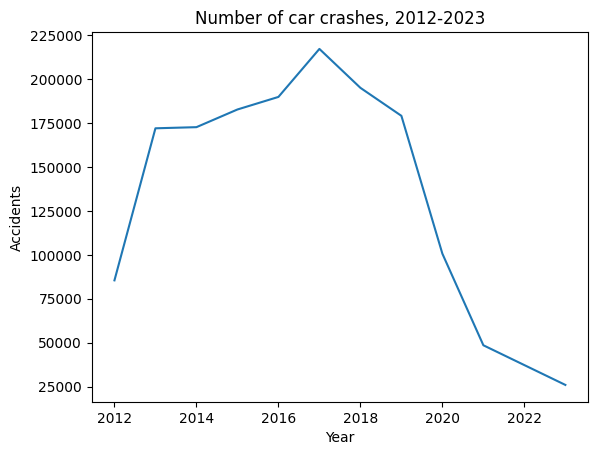

In [34]:
count_by_year = merged_df.groupby(by = 'Year').count()
fig1 = sns.lineplot(data = count_by_year, x = 'Year', y = 'NUMBER OF PERSONS INJURED');
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.title('Number of car crashes, 2012-2023');

We can see that there is a major increase of car accident between 2012 and 2014, and a major drop of car crash numbers at 2020. We suppose that the drop may due to the breakout of COVID-19 that causes the decrease of traffic flow.
Then we draw the boxplot of maximum and minimum temperature during this time frame.

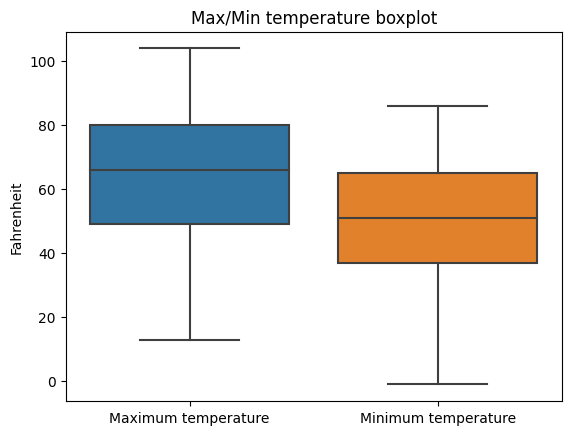

In [35]:
fig2 = sns.boxplot(data = merged_df[['Maximum temperature', 'Minimum temperature']])
plt.title('Max/Min temperature boxplot')
plt.ylabel('Fahrenheit');

We also draw the histogram to see the distribution of average wind speed during this time frame, this distribution is right-skewed.

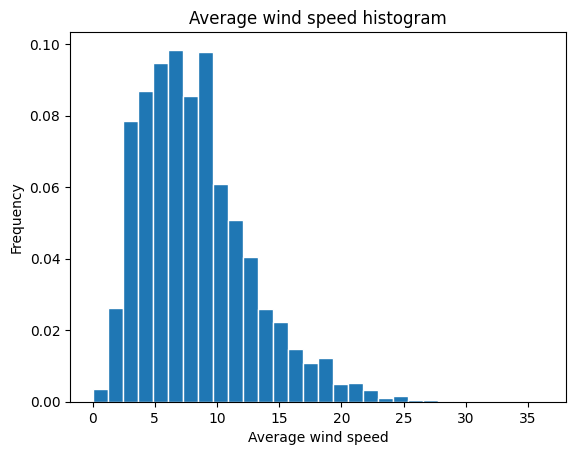

In [36]:
fig3 = merged_df['Average wind speed'].plot(kind = 'hist', density = True, ec = 'w', bins = 30);
plt.xlabel('Average wind speed')
plt.title('Average wind speed histogram');

Select the major accidents and show the time trends for the number of injuries and deaths caused by car crashed.

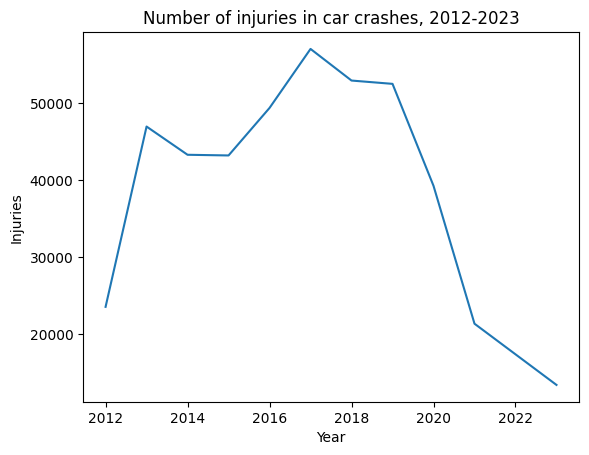

In [37]:
sum_by_year = merged_df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'Year']].groupby(by = 'Year').sum()
fig4 = sns.lineplot(data = sum_by_year, x = 'Year', y = 'NUMBER OF PERSONS INJURED');
plt.xlabel('Year')
plt.ylabel('Injuries')
plt.title('Number of injuries in car crashes, 2012-2023');

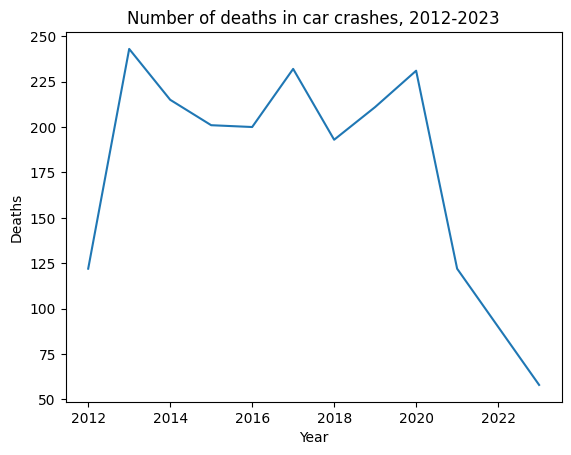

In [38]:
fig5 = sns.lineplot(data = sum_by_year, x = 'Year', y = 'NUMBER OF PERSONS KILLED');
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Number of deaths in car crashes, 2012-2023');

We found that the trend of injuries is similar to the trend of total car crashes, while there are some discrepancy in number of deaths trend.
We broke down the day hours into four categories to find if there is a distribution difference between major incidents and non-major incidents.

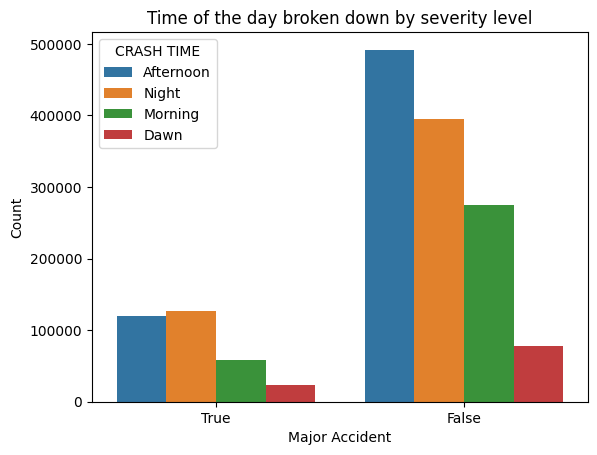

In [39]:
fig6 = sns.countplot(x = 'IS Major Accident', hue = 'CRASH TIME', data = merged_df, order = [True, False])
plt.xlabel('Major Accident')
plt.ylabel('Count')
plt.title('Time of the day broken down by severity level');

We also did the break down of different weather types between major and non-major accidents.

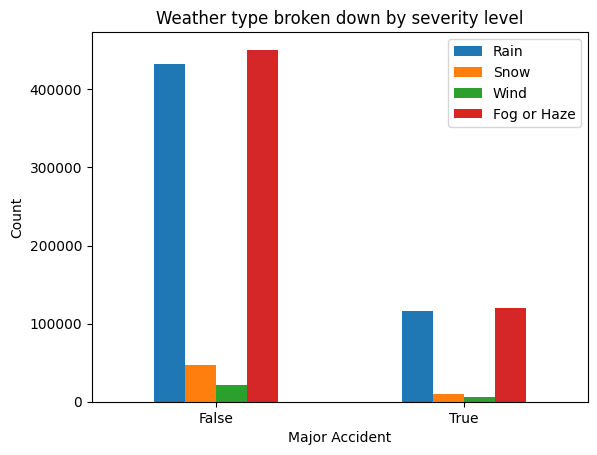

In [40]:
fig7 = merged_df[['IS Major Accident', 'Rain', 'Snow', 'Wind', 'Fog or Haze']].groupby(by='IS Major Accident').sum().plot.bar()
plt.xlabel('Major Accident')
plt.ylabel('Count')
plt.title('Weather type broken down by severity level')
plt.xticks(rotation = 0);

As the plots shown, there are little to none difference in the distribution of weather types, but at night the possibility of major accidents exceeds non-major accidents while non-major accidents happen the most in the afternoon.


Similarly, We broke down the day hours and weather type into same four major sections to find if there is a distribution difference between single vehicel and multi-vehicle accidents.

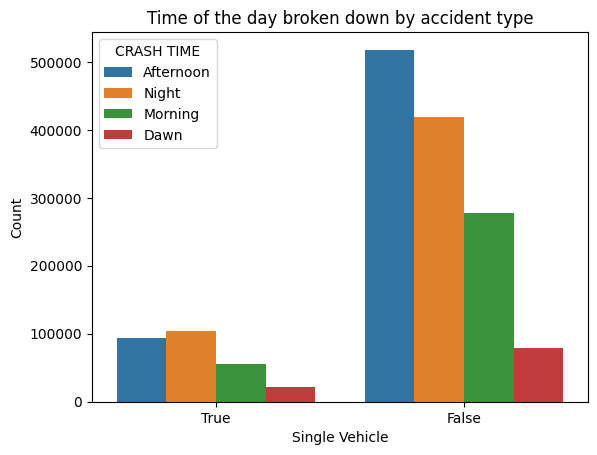

In [41]:
fig8 = sns.countplot(x = 'IS SINGLE VEHICLE', hue = 'CRASH TIME', data = merged_df, order = [True, False])
plt.xlabel('Single Vehicle')
plt.ylabel('Count')
plt.title('Time of the day broken down by accident type');

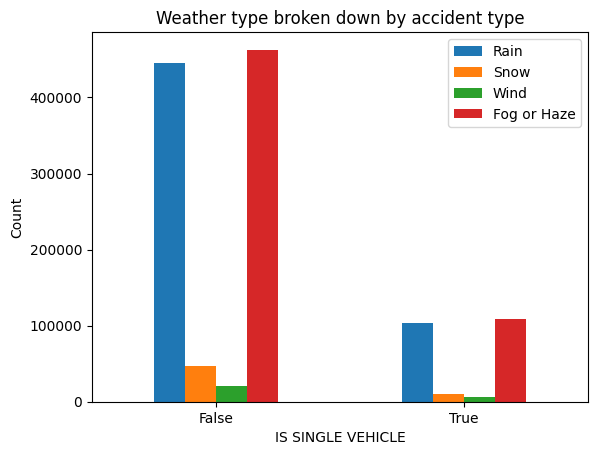

In [42]:
fig9 = merged_df[['IS SINGLE VEHICLE', 'Rain', 'Snow', 'Wind', 'Fog or Haze']].groupby(by='IS SINGLE VEHICLE').sum().plot.bar()
plt.xlabel('IS SINGLE VEHICLE')
plt.ylabel('Count')
plt.title('Weather type broken down by accident type')
plt.xticks(rotation = 0);

The patterns are also similar: there are little to none difference in the distribution of weather types but at night single vehicle incidents are more likely to happen, and in the afternoon multi vehicle incidents are more likely to happen.

**Inferential Analysis**

We will use multi-variate linear regression to see how the time of the day effect and different weather types affect the degree of severity of car crashes.

In [66]:
mod1 = smf.ols(formula = 'Q("IS Major Accident") ~ Q("CRASH TIME_Morning") + Q("CRASH TIME_Afternoon") + Q("CRASH TIME_Night")', data = merged_df)
res1 = mod1.fit()
print(res1.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("IS Major Accident")   R-squared:                       0.004
Model:                                OLS   Adj. R-squared:                  0.004
Method:                     Least Squares   F-statistic:                     2358.
Date:                    Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                            21:47:11   Log-Likelihood:            -8.1180e+05
No. Observations:                 1568617   AIC:                         1.624e+06
Df Residuals:                     1568613   BIC:                         1.624e+06
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

We can see that with Dawn as the base category, and including the other three time of the day as dummy variables to avoid multicollinearity, night time increases the probablity of major accidents, and morning and afternoon decrease he probablity of major accidents. All independent variables are statistically significant 1%. Since the R-sqaure is very low, we will further include addition features and control variables to the model.

In [71]:
mod2 = smf.ols(formula = 'Q("IS Major Accident") ~ Q("CRASH TIME_Morning") + Q("CRASH TIME_Afternoon") + Q("CRASH TIME_Night") + Q("IS SINGLE VEHICLE") + Q("Driving skill factor") + Q("External factor") + Q("Inattention/Inability factor") + Q("Vehicle defect factor")', data = merged_df)
res2 = mod2.fit()
print(res2.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("IS Major Accident")   R-squared:                       0.043
Model:                                OLS   Adj. R-squared:                  0.043
Method:                     Least Squares   F-statistic:                     8840.
Date:                    Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                            22:08:26   Log-Likelihood:            -7.8074e+05
No. Observations:                 1568617   AIC:                         1.562e+06
Df Residuals:                     1568608   BIC:                         1.562e+06
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Adding the IS SINGLE VEHICLE dummy and four weights of accident causes increase the R-sqaure by roughly 10 times, and all independet variables all statistically significant at 1%. We can see that the sign on time of the day variables stay the same, and Driving skill factor, External factor, and Inattention/Inability factor all increase the probability of severity car crashes, while Vehicle defect factor decrease the probability of severity car crashes.

In [67]:
merged_df.columns

Index(['CRASH DATE', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'IS SINGLE VEHICLE', 'IS Major Accident',
       'CRASH TIME_Afternoon', 'CRASH TIME_Dawn', 'CRASH TIME_Morning',
       'CRASH TIME_Night', 'CRASH TIME', 'Driving skill factor',
       'External factor', 'Inattention/Inability factor',
       'Vehicle defect factor', 'STATION', 'Average wind speed',
       'Precipitation', 'Snowfall', 'Maximum temperature',
       'Minimum temperature', 'Rain', 'Snow', 'Wind', 'Fog or Haze', 'Year'],
      dtype='object')

In [80]:
mod3 = smf.ols(formula = 'Q("IS Major Accident") ~ Q("CRASH TIME_Morning") + Q("CRASH TIME_Afternoon") + Q("CRASH TIME_Night") + Q("IS SINGLE VEHICLE") + Q("Driving skill factor") + Q("External factor") + Q("Inattention/Inability factor") + Q("Vehicle defect factor") + Q("Maximum temperature") + Q("Minimum temperature") + Q("Rain") + Q("Snow") + Q("Wind") + Q("Fog or Haze")', data = merged_df)
res3 = mod3.fit()
print(res3.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("IS Major Accident")   R-squared:                       0.044
Model:                                OLS   Adj. R-squared:                  0.044
Method:                     Least Squares   F-statistic:                     5132.
Date:                    Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                            22:23:41   Log-Likelihood:            -7.8021e+05
No. Observations:                 1568617   AIC:                         1.560e+06
Df Residuals:                     1568602   BIC:                         1.561e+06
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

We can see that in rainy days the probability of car crashes increases, but that is not in case in snowy, foggy, or hazy days. Weather type windy is not statiscally significant at any level. Adding weather and weather type variables do not affect the signs on other independent variables, and we can see that although there are 14 explantory varaibles in the model, the R-sqaure in still very low at 0.044. This indicates that maybe multi-variate linear regression is not a very good way to see the relationship between accident severity and time of the day and weather types. Thus, we will explore other prediction models to better explain the data.

**Prediction**

We will use the GBC model to predict whether an accident involves injury or death. First see the breakdown of IS Major Accident.

In [43]:
merged_df['IS Major Accident'].value_counts()

IS Major Accident
False    1240083
True      328534
Name: count, dtype: int64

The column was filled with False and True, we replace them with 1 and 0

In [44]:
def convert_accident(accident):
        if accident == True:
            return 1.0
        else:
            return 0.0

In [45]:
merged_df['IS Major Accident'] = merged_df['IS Major Accident'].apply(lambda x: convert_accident(x))

In [46]:
merged_df['IS Major Accident'].value_counts()

IS Major Accident
0.0    1240083
1.0     328534
Name: count, dtype: int64

Setting up the data, split the data into training and test sets

In [47]:
merged_df.head()

,CRASH DATE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,IS SINGLE VEHICLE,IS Major Accident,CRASH TIME_Afternoon,CRASH TIME_Dawn,CRASH TIME_Morning,...,Average wind speed,Precipitation,Snowfall,Maximum temperature,Minimum temperature,Rain,Snow,Wind,Fog or Haze,Year
0,2012-07-01,40.744660,-73.906805,0.0,0.0,False,0.0,True,False,False,...,8.95,0.0,0.0,97.0,77.0,False,False,False,False,2012
1,2012-07-01,40.645032,-73.919978,0.0,0.0,False,0.0,False,False,False,...,8.95,0.0,0.0,97.0,77.0,False,False,False,False,2012
2,2012-07-01,40.744927,-73.837080,2.0,0.0,False,1.0,True,False,False,...,8.95,0.0,0.0,97.0,77.0,False,False,False,False,2012
3,2012-07-01,40.742005,-73.827874,0.0,0.0,False,0.0,False,False,False,...,8.95,0.0,0.0,97.0,77.0,False,False,False,False,2012
4,2012-07-01,40.755747,-73.766149,0.0,0.0,False,0.0,False,False,False,...,8.95,0.0,0.0,97.0,77.0,False,False,False,False,2012


In [48]:
merged_df.columns

Index(['CRASH DATE', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'IS SINGLE VEHICLE', 'IS Major Accident',
       'CRASH TIME_Afternoon', 'CRASH TIME_Dawn', 'CRASH TIME_Morning',
       'CRASH TIME_Night', 'CRASH TIME', 'Driving skill factor',
       'External factor', 'Inattention/Inability factor',
       'Vehicle defect factor', 'STATION', 'Average wind speed',
       'Precipitation', 'Snowfall', 'Maximum temperature',
       'Minimum temperature', 'Rain', 'Snow', 'Wind', 'Fog or Haze', 'Year'],
      dtype='object')

create a balanced model such that Major accident and mot major accident group are of same sample size

In [49]:
merged_df_balanced = pd.concat([merged_df[merged_df['IS Major Accident'] == 0].sample(n=(merged_df['IS Major Accident'] == 1).sum()), merged_df[merged_df['IS Major Accident'] == 1]])

Run variable selection

In [50]:
X_cols = "CRASH TIME_Afternoon, CRASH TIME_Dawn, CRASH TIME_Morning, CRASH TIME_Night, Driving skill factor, External factor, Inattention/Inability factor, Vehicle defect factor".split(', ') + ['Rain', 'Snow', 'Wind', 'Fog or Haze', 'IS SINGLE VEHICLE',  'Average wind speed',
       'Precipitation']
X_cols

['CRASH TIME_Afternoon',
 'CRASH TIME_Dawn',
 'CRASH TIME_Morning',
 'CRASH TIME_Night',
 'Driving skill factor',
 'External factor',
 'Inattention/Inability factor',
 'Vehicle defect factor',
 'Rain',
 'Snow',
 'Wind',
 'Fog or Haze',
 'IS SINGLE VEHICLE',
 'Average wind speed',
 'Precipitation']

Separate dependent and independent variables

In [51]:
X = merged_df_balanced[X_cols]

In [52]:
y = merged_df_balanced['IS Major Accident']

 Train Test Split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Import gbc model

In [54]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

Train GBC model

In [55]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)


GradientBoostingClassifier()

See feature importances

In [56]:
dict(zip(X_train.columns, gbc.feature_importances_))


{'CRASH TIME_Afternoon': 0.00812196526624659,
 'CRASH TIME_Dawn': 0.008469201043859374,
 'CRASH TIME_Morning': 0.02692145460827864,
 'CRASH TIME_Night': 0.05162967930609302,
 'Driving skill factor': 0.04988142186682061,
 'External factor': 0.03352838057884885,
 'Inattention/Inability factor': 0.04514979431420401,
 'Vehicle defect factor': 0.0005631578279318849,
 'Rain': 0.0,
 'Snow': 0.009726832554424138,
 'Wind': 0.0,
 'Fog or Haze': 0.0022134065294898827,
 'IS SINGLE VEHICLE': 0.7274632931538022,
 'Average wind speed': 0.030612274909146486,
 'Precipitation': 0.005719138040854272}

Then we see the score of training set and test set.

In [57]:
gbc.score(X_train, y_train)

0.5987812524731078

In [58]:
gbc.score(X_test, y_test)

0.5977585272757158

In [59]:
y_pred = gbc.predict(X_test)

Show normalized confusion matrix.

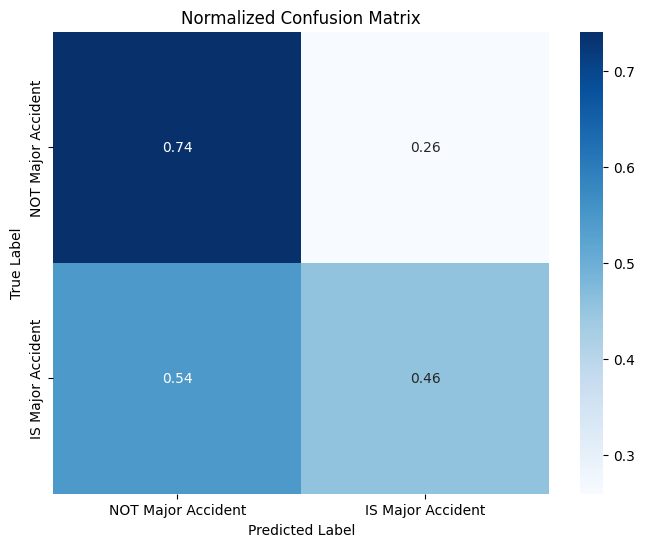

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define class labels
class_labels = ['NOT Major Accident', 'IS Major Accident']

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Ethics & Privacy

This project utilizes public datasets from Kaggle and the NOAA database, strictly for academic purposes, following all applicable data usage terms. Any potential data inaccuracies are tackled by cross-verifying with independent sources. While the study is based on data from New York City, we recognize that the findings might not generalize to other geographic locations with differing conditions. We employ weather data that might not align perfectly with the location of every accident, acknowledging this as a limitation of the study. Our analysis aims to enhance understanding of traffic accidents and contribute to improving public safety. We adhere strictly to ethical standards, ensuring data privacy, and not using the findings for invasive surveillance or to blame individuals. This project is an effort to identify broader patterns that could inform policy and safety measures.

# Conclusion & Discussion

The research aimed to explore the potential influence of weather conditions and the time of day on the severity of vehicle collisions in New York City. While automobile safety and traffic patterns have been well-studied areas, the objective was to add depth to the understanding by integrating environmental factors into the analysis. After conducting a thorough data cleaning process, we moved on to perform statistical analyses and develop predictive models. The exploration focused on the severity of vehicle collisions across different times of the day and under varying weather conditions. We hypothesized that specific conditions, such as adverse weather and peak traffic hours, would have a significant impact on the severity of the accidents. 


From the inferential analysis with multi-variate linear regression, the time of the day effect on accident severity in only positive in the night category, while the morning and afternoon category are all negative, conforms with the intuition thta lighting a important factor that affect acident severity. For the weather effect, we find out that in rainy days has a positive effect on accident severity while all other weather types are either not statistically significant or negative, which contradicts with the previous studies stating that all weather types have a negative effect. This result is more intuitive, but could be lacking in controls like traffic conditions and road geometries, supported by the fact that the R-sqaure in the regression models are very low. 

Then we proceed to a prediction model using gadient boosting. We can see that the model can predict well on NOT Major accident but perform poorly on IS Major Accident prediction. The reason may be that the dataset is biased and there are more factors (such as characteristics of driver) that can impact the severity of car accidents, that is, we cannot reject the null hypothesis. However, from feature importane score we can see that among the time ranges, night has the greatest impact on car crashes. Among weather variables, rain has greatest impact, and among factors driving skill factor has greatest impact. To advance this research, we propose expanding the geographical scope, integrating additional factors like road type, traffic volume, and vehicle types. More granular weather data that aligns more accurately with the accident data could also be beneficial. Despite the limitations and the inconclusive nature of some findings, the research offers a foundation for further studies on this complex, multifaceted issue of vehicle collisions.